# UMAP
### JX, 10/13/22
> UMAP and HDBSCAN Clustering


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/tmp/ipykernel_16261/3483869115.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2022-10-13 12:59:25.681392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-13 12:59:25.681448: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-13 12:59:25.716755: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-13 12:59:26.459519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object fil

In [2]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.quickplots import draw_projection_plots

## Load syllable_df

In [3]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [4]:
SAVE_PATH = PROCESSED_DIR / 'starling_b1555_syllable_df_spec_aud.pickle'
syllable_df = pd.read_pickle(SAVE_PATH)

In [5]:
syllable_df.head()

,ae_df_index,indv,start_ms,end_ms,file,onsets_ms,offsets_ms,audio,rate,spectrogram
0,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,6.564,7.172,"[0.0053705692803437165, 0.0053705692803437165,...",48000,"[[8, 8, 8, 8, 7, 10, 13, 7, 8, 8, 8, 8, 8, 8, ..."
1,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,8.712,9.454,"[-0.002697841726618705, -0.0035971223021582736...",48000,"[[9, 9, 9, 8, 12, 18, 7, 9, 9, 9, 9, 9, 9, 9, ..."
2,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,9.461,9.663,"[-0.10294117647058823, -0.07352941176470588, -...",48000,"[[8, 8, 8, 8, 91, 54, 18, 16, 12, 17, 13, 84, ..."
3,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,11.317,11.505,"[-0.043343653250773995, -0.04953560371517028, ...",48000,"[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,..."
4,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,11.508,11.820,"[0.011627906976744186, 0.007751937984496124, 0...",48000,"[[8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8,..."


In [6]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

## Cluster with UMAP

In [7]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [8]:
## get specs and cluster them
specs = list(syllable_df.spectrogram.values)
specs_flattened = flatten_spectrograms(specs)
fit = umap.UMAP(min_dist = 0.25, verbose = True)
z = list(fit.fit_transform(specs_flattened))
syllable_df['umap'] = z

UMAP(min_dist=0.25, verbose=True)
Thu Oct 13 12:59:37 2022 Construct fuzzy simplicial set
Thu Oct 13 12:59:38 2022 Finding Nearest Neighbors
Thu Oct 13 12:59:38 2022 Building RP forest with 17 trees
Thu Oct 13 12:59:39 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Oct 13 12:59:57 2022 Finished Nearest Neighbor Search
Thu Oct 13 13:00:01 2022 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:26]


Thu Oct 13 13:00:52 2022 Finished embedding


In [9]:
syllable_df

,ae_df_index,indv,start_ms,end_ms,file,onsets_ms,offsets_ms,audio,rate,spectrogram,umap
0,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,6.564,7.172,"[0.0053705692803437165, 0.0053705692803437165,...",48000,"[[8, 8, 8, 8, 7, 10, 13, 7, 8, 8, 8, 8, 8, 8, ...","[3.6271234, 12.384825]"
1,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,8.712,9.454,"[-0.002697841726618705, -0.0035971223021582736...",48000,"[[9, 9, 9, 8, 12, 18, 7, 9, 9, 9, 9, 9, 9, 9, ...","[15.628392, 13.166531]"
2,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,9.461,9.663,"[-0.10294117647058823, -0.07352941176470588, -...",48000,"[[8, 8, 8, 8, 91, 54, 18, 16, 12, 17, 13, 84, ...","[13.1906805, -0.26212618]"
3,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,11.317,11.505,"[-0.043343653250773995, -0.04953560371517028, ...",48000,"[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,...","[10.584096, 4.448255]"
4,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,11.508,11.820,"[0.011627906976744186, 0.007751937984496124, 0...",48000,"[[8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8,...","[11.064405, 5.525021]"
...,...,...,...,...,...,...,...,...,...,...,...
53752,1040,b1555,710815,714180,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,2.107,2.270,"[0.03211009174311927, 0.03211009174311927, 0.0...",48000,"[[2, 2, 2, 2, 2, 27, 80, 92, 60, 38, 60, 31, 4...","[5.326013, 6.613445]"
53753,1040,b1555,710815,714180,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,2.624,2.880,"[0.23529411764705882, 0.17647058823529413, 0.2...",48000,"[[0, 0, 0, 0, 46, 60, 62, 82, 58, 67, 71, 64, ...","[6.097737, 6.1049037]"
53754,1040,b1555,710815,714180,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,2.956,3.162,"[0.009009009009009009, 0.009009009009009009, 0...",48000,"[[9, 9, 9, 9, 9, 9, 9, 10, 9, 11, 13, 3, 44, 4...","[5.3194757, 5.6155524]"
53755,1040,b1555,710815,714180,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,3.393,3.564,"[-0.02830188679245283, -0.018867924528301886, ...",48000,"[[4, 4, 4, 4, 4, 43, 13, 30, 18, 12, 11, 2, 77...","[6.02826, 5.996357]"


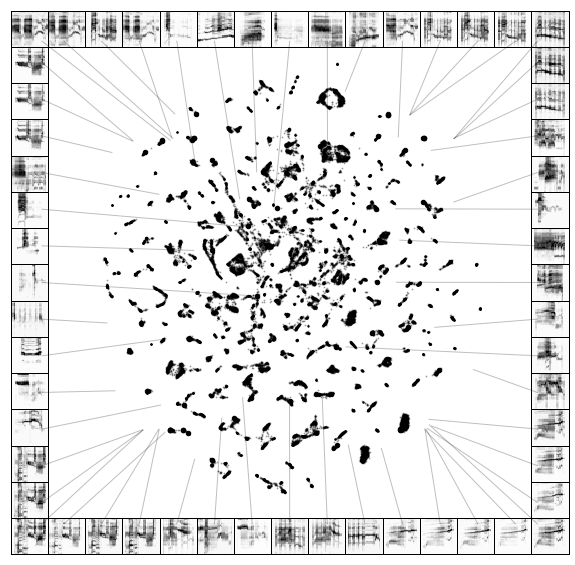

In [10]:
scatter_spec(
        np.vstack(z),
        specs,
        column_size=15,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            #'labels': list(indv_df.phrase.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True
    );
plt.show()

## Cluster with HDBSCAN

In [11]:
import hdbscan

In [25]:
z = np.vstack(syllable_df.umap.values)
min_cluster_size = int(len(z) * 0.001)
print(min_cluster_size)
clusterer = hdbscan.HDBSCAN(
    min_cluster_size = min_cluster_size
).fit(z)
syllable_df.loc[:, 'hdbscan_labels'] = list(clusterer.labels_)

53


/home/AD/j8xing/avgn_paper/avgn/visualization/projections.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors = np.array([lab_dict[i] for i in labels])


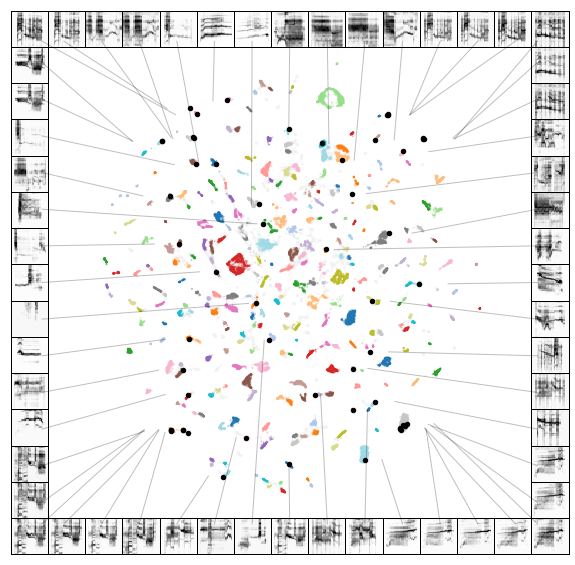

In [26]:
scatter_spec(
        np.vstack(z),
        specs,
        column_size=15,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(syllable_df.hdbscan_labels.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True
    );
plt.show()

In [27]:
np.unique(syllable_df['hdbscan_labels'].values)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [28]:
syllable_df.drop(columns = ['audio', 'spectrogram']).head()

,ae_df_index,indv,start_ms,end_ms,file,onsets_ms,offsets_ms,rate,umap,hdbscan_labels
0,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,6.564,7.172,48000,"[3.6271234, 12.384825]",138
1,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,8.712,9.454,48000,"[15.628392, 13.166531]",140
2,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,9.461,9.663,48000,"[13.1906805, -0.26212618]",139
3,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,11.317,11.505,48000,"[10.584096, 4.448255]",252
4,0,b1555,508500,566065,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,11.508,11.820,48000,"[11.064405, 5.525021]",221


## Pickle dataframe

In [29]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [30]:
SAVE_PATH = PROCESSED_DIR / 'starling_b1555_syllable_df_labels.pickle'
ensure_dir(SAVE_PATH)

In [31]:
syllable_df.to_pickle(SAVE_PATH)